## 스프린트 미션#4
5팀 전수현  
제출일자: 25.06.04

In [1]:
import pandas as pd

bank_df = pd.read_csv("bank-additional-full.csv", sep=";")
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

지난 과제가 Regression을 해보는 것이었다면 이번 과제는 이진 분류(`y: 정기 예금 가입 여부`)를 Decision tree와 앙상블 기법을 사용하여 진행하는 것이다. 따라서 먼저 데이터를 분석하고 pre-processing을 진행하였다.

### (1) Data Preprocessing

먼저 카테고리형 데이터를 적절하게 인코딩 해야한다. Label 데이터는 단순 이진값이므로 수치형으로 먼저 바꿔주면

In [2]:
# ba nk_df["y"] == "yes"
bank_df["y"] = bank_df["y"].map({"yes": 1, "no": 0})
bank_df["y"]
# X_train = bank_df.drop("y", axis=1)
# y_Train = bank_df["y"]

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [3]:
# 이진 분류의 label: bool 타입
# y_df = bank_df["y"]
# y_df[y_df == "yes"] = 1
# y_df[y_df == "no"] = 0

# if bank_df["y"] == "yes":
#     y_df["y"] = 1
# else:
#     y_df["y"] = 0

# # Y_train

In [4]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [5]:
bank_df["previous"].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

지난 과제와 다르게 이 데이터는 대부분의 데이터가 범주형이기 때문에 적절하게 인코딩을 하는 것이 주요한 데이터 전처리 과정이 될 것 같다.  


In [6]:
# 모든 데이터값을 dummy로 만들기
a = pd.get_dummies(bank_df)
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  bool   
 12  job_blue-collar                41188 non-null 

이런식으로 모든 값을 dummy로 만들어 버리는 접근은 feature의 갯수를 필요 이상으로 늘리는 일이기 때문에 나이브한 접근 방식이다. 각 칼럼의 특징을 잘 살펴보고 시도해야겠다.

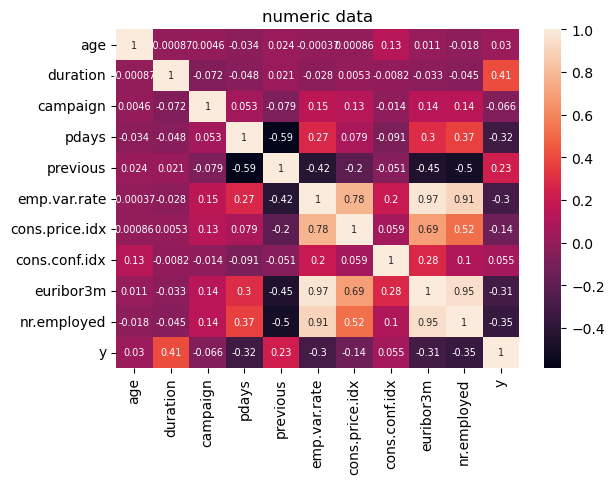

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터타입이 수치형 column만 뽑아내서 correlation 매핑

sns.heatmap(
    bank_df[bank_df.select_dtypes(include=["float", "int"]).columns].corr(),
    annot=True,
    annot_kws={"size": 7},
)
# sns.heatmap(bank_df.corr())
plt.tight_layout()
plt.title("numeric data")
plt.show()

주목해야할 feature는 `duration`인데 `y`와 연관성이 높다. 그런데 kaggle 공식 문서에서 언급이 되어있다시피 이 값은 결과가 나온 후에 진행된 이벤트이므로 아무런 영향을 주지 못하고 오히려 성능을 뻥튀기 시키는 feature이므로 삭제시킨다.

In [8]:
bank_df = bank_df.drop(columns="duration")
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


또한 주목할만한 점은 cons.price.idx, emp.var.rate, euribor3m, nr.employed, cons.conf.idx 와 같은 데이터는 다소 상관관계가 높음을 볼 수 있었기 때문에 feature 삭제를 고려해야 한다. 보통 0.7 이상의 correlation이면 삭제를 한다고 한다.

In [9]:
import numpy as np

corr_matirx = bank_df.select_dtypes(include=["float", "int"]).corr().abs()
corr_matirx > 0.7

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,True,False,False,False,False,False,False,False,False,False
campaign,False,True,False,False,False,False,False,False,False,False
pdays,False,False,True,False,False,False,False,False,False,False
previous,False,False,False,True,False,False,False,False,False,False
emp.var.rate,False,False,False,False,True,True,False,True,True,False
cons.price.idx,False,False,False,False,True,True,False,False,False,False
cons.conf.idx,False,False,False,False,False,False,True,False,False,False
euribor3m,False,False,False,False,True,False,False,True,True,False
nr.employed,False,False,False,False,True,False,False,True,True,False
y,False,False,False,False,False,False,False,False,False,True


In [10]:
upper = corr_matirx.where(np.triu(np.ones(corr_matirx.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print("상관관계로 제거할 feature:", to_drop)

상관관계로 제거할 feature: ['cons.price.idx', 'euribor3m', 'nr.employed']


In [11]:
bank_df[["euribor3m", "emp.var.rate", "nr.employed"]].corr()

,euribor3m,emp.var.rate,nr.employed
euribor3m,1.000000,0.972245,0.945154
emp.var.rate,0.972245,1.000000,0.906970
nr.employed,0.945154,0.906970,1.000000


문제가 되는 feature는 
`cons.price.idx`: 소비자 물가지수  
`euribor3m`: 유럽 은행 금리   
`nr.employed`: 고용자 수
인데 3가지 모두 서로 상관 관계가 높으니 거의 동일한 정보라고 생각해도 된다. 이 데이터들의 분포를 살펴보면


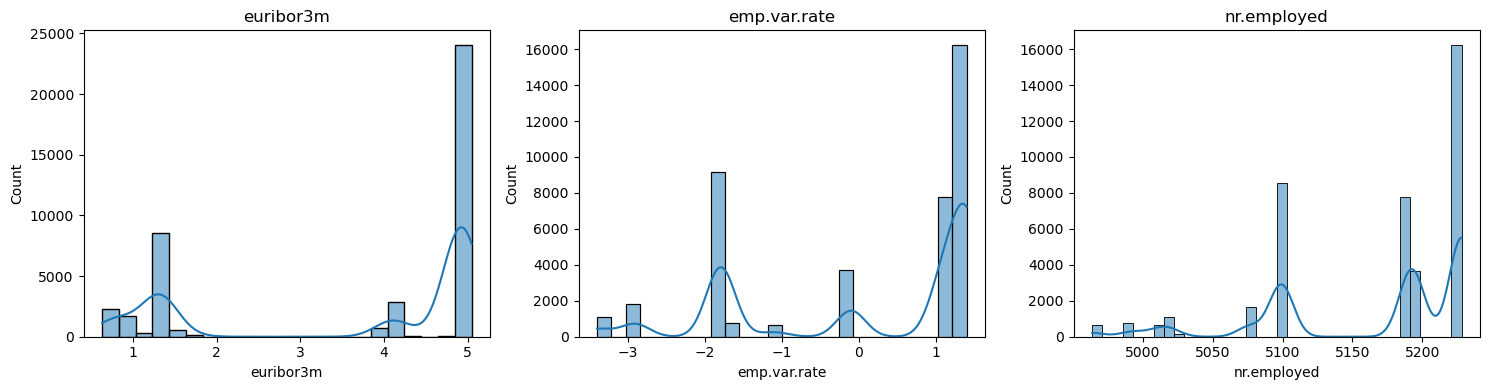

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(["euribor3m", "emp.var.rate", "nr.employed"]):
    sns.histplot(bank_df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

위 데이터 분포를 살펴본 결과 모두 비슷한 경향을 보였기 때문에 정성적인 판단으로 예금 가입과 연관성이 높은 유럽 은행 금리를 선택했다.

In [13]:
bank_df = bank_df.drop(columns=["emp.var.rate", "nr.employed"])

In [14]:
from sklearn.model_selection import train_test_split

y = bank_df["y"]
X = bank_df.drop(columns=["y"])

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,  # 클래스 비율
    random_state=42,
)

학습을 위한 train와 test 데이터로 나누었고 수치형은 그대로 쓰고 범주형 데이터를 처리하기 위해서 싸이킷런의 ColumnTransformer와 Pipelne으로 코드를 구성했다. 

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# 수치형/범주형 column 리스트를 따로 정의
categorical_features = X.select_dtypes(include="object").columns
numeric_features = X.select_dtypes(include=["float", "int"]).columns


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
            categorical_features,
        ),
    ]
)

clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)

In [16]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [17]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.58      0.29      0.39       928

    accuracy                           0.90      8238
   macro avg       0.75      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238



데이터를 훈련, 테스트셋으로 나누고 적당한 모델을 선택해서 훈련까지 마쳤다. 이제는 지난 과제와 마찬가지로 여러 모델을 추려보고 하이퍼파라미터 수행을 위해서 gridsearch를 진행시켜 최적의 모델을 선택하면 이 과제가 완성이 된다

### 2. Model selection & train & eval  

모델은 대표적인 디시전트리 4가지에 대해서 진행을 하였다.  
1) DecisionTreeClassifier: 기본적인 디시전 트리
2) RandomForestClassifier: 대표적인 배깅 모델
3) GradientBoostingClassifier: 싸이킷런의 GBDT 구한 부스팅 모델
4) HistGradientBoostingClassifier: 싸이킷런의 최신 GBDT 구현 부스팅 모델

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

models = {
    "DecisionTree": (
        DecisionTreeClassifier(random_state=42),
        {
            "classifier__criterion": ["gini", "entropy", "log_loss"],  # 분할 기준
            "classifier__max_depth": [3, 5, 7, 10, 15, None],  # 깊이 제한
            "classifier__min_samples_split": [
                2,
                5,
                10,
                20,
            ],  # 내부 노드 분할 최소 샘플 수
            "classifier__min_samples_leaf": [1, 2, 4, 10],  # 리프 노드 최소 샘플 수
            "classifier__max_features": [
                None,
                "sqrt",
                "log2",
            ],  # 분할 시 고려할 feature 수
        },
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {
            "classifier__n_estimators": [100, 300],
            "classifier__max_depth": [None, 10, 20],
            "classifier__min_samples_split": [2, 5],
        },
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {
            "classifier__n_estimators": [100, 200],
            "classifier__learning_rate": [0.01, 0.1],
            "classifier__max_depth": [3, 5],
        },
    ),
    "HistGradientBoosting": (
        HistGradientBoostingClassifier(random_state=42),
        {
            "classifier__learning_rate": [0.01, 0.1],
            "classifier__max_iter": [100, 200],
            "classifier__max_depth": [None, 5],
        },
    ),
}

# 7. 모델 학습 및 평가 루프
for name, (model, param_grid) in models.items():
    print(f"\n##### [{name}] Grid Search #####")

    pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", model)])

    grid = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1", n_jobs=-1)
    grid.fit(X_train, y_train)

    print(f"** {name} Best Params: {grid.best_params_}")
    print(f"** {name} Best CV F1 Score: {grid.best_score_:.4f}")

    # 테스트셋 성능
    y_pred = grid.predict(X_test)
    y_proba = grid.predict_proba(X_test)[:, 1]

    print("\n- Classification Report (Test Set):")
    print(classification_report(y_test, y_pred))
    print(f"- ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\n[Best Model Test Performance]")
print(classification_report(y_test, y_pred_best))


##### [DecisionTree] Grid Search #####


** DecisionTree Best Params: {'classifier__criterion': 'gini', 'classifier__max_depth': 7, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
** DecisionTree Best CV F1 Score: 0.3777

- Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.64      0.29      0.40       928

    accuracy                           0.90      8238
   macro avg       0.78      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238

- ROC AUC Score: 0.8083

##### [RandomForest] Grid Search #####
** RandomForest Best Params: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
** RandomForest Best CV F1 Score: 0.3651

- Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1     

In [19]:
def evaluate_model(name, model):
    pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))

그리고 앙상블 기법에 대해서도 진행을 해보았다.

In [20]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=300, random_state=42)),
        ("gb", GradientBoostingClassifier(random_state=42)),
        ("dt", DecisionTreeClassifier(random_state=42)),
    ],
    voting="soft",
)


evaluate_model("Voting Ensemble", voting_clf)


--- Voting Ensemble ---
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7310
           1       0.50      0.32      0.39       928

    accuracy                           0.89      8238
   macro avg       0.71      0.64      0.66      8238
weighted avg       0.87      0.89      0.88      8238



### 3. 결론 

이번 과제는 주어진 bank-additional-full.csv 데이터를 트리 모델을 통한 최적의 분류 모델을 선택, 비교해보았다. 총 4가지 decision tree에 대한 gridsearch를 진행했고 마지막은 voting을 통한 앙상블 모델까지 구현해보았다.

결론적으로 Random Forest 모델이 가장 우수한 F1-score를 기록하였으며 나머지 모델과 앙상블 또한 거의 비슷한 성능을 보여주었다. 랜덤 포레스트 모델은 여러 장점이 있지만 이러한 분류 모델에서는 우수한 해석 능력으로 합리적인 판단에 도움을 줄 수 있기 때문에 가장 좋은 모델이라고 볼 수 있다.